In [2]:
import numpy as np
import VBMicrolensing
import matplotlib.pyplot as plt
import math

In [ ]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

VBM.astrometry = True

In [4]:
VBM.TripleAstroLightCurve?

Docstring:
Triple light curve and astrometry for a full array of observations.

Parameters
----------
params : list[float]
    List of parameters [log_s, log_q, u0, alpha, log_rho, log_tE, t0, 
                        log(s13), log(q3), psi
                        paiN, paiE,     #components of the parallax vector
                        muS_N, muS_E,   # proper motion components of the source (mas/yr)
                        pai_S,          # parallax of the source (mas)
                        thetaE          # Einstein angle (mas) 
                        ] 
times : list[float] 
    Array of times at which the magnification is calculated.

Returns
-------
results: list[list[float],list[float],list[float],list[float],list[float],list[float],list[float]] 
    [Magnification array,
        centroid of images N array, centroid of images E array, 
        centroid of lens N array, centroid of lens E array,
        source position y1 array, source position y2 array]
Type:      method

In [6]:
VBM.SetObjectCoordinates("17:51:40.2082 -29:53:26.502"); 

In [ ]:
# Parameters
s12 = 0.9
q2 = 0.028997
u0 = 0.1
alpha = 0.261799
rho = 0.01
tE = 20
t0 = 0
s23 = 1.5
q3 = 0.003270
psi = 0.785398

# Astrometry
paiN = 0.1
paiE = 0.1
muS_N = -3
muS_E = -2
pai_S = 0.12
thetaE = 5.15

# Parameter list
params = [
    math.log(s12), math.log(q2), u0, alpha, math.log(rho), math.log(tE), t0,
    math.log(s23), math.log(q3), psi,
    paiN, paiE, muS_N, muS_E, pai_S, thetaE
]

# Time
t = np.linspace(-3*365.25+t0,3*365.25+t0,10000)

In [ ]:
# Call function
results = VBM.TripleAstroLightCurve(params, t)

: 

In [1]:
import VBMicrolensing
VBM = VBMicrolensing.VBMicrolensing()
import numpy as np
import math
import matplotlib.pyplot as plt

# Standard parameters for PSPL with parallax
t0 = 5034.0
tE = 27.0
u0 = 0.1
paiN = -0.1 
paiE = +0.2

# Additional parameters required for centroid trajectory
muS_Dec = -3.597 # Source proper motion (Dec) in mas/yr
muS_RA = -2.263 # Source proper motion (RA) in mas/yr
paiS = 0.12 # Source parallax in mas
thetaE = 5.15 # Einstein angle in mas

VBM.SetObjectCoordinates("17:51:40.2082 -29:53:26.502");  # Coordinates of the microlensing event

# Here we fill the array of parameters
pr = [u0,math.log(tE),t0, paiN,paiE,     # Standar light curve parameters for PSPL including parallax
     muS_Dec,muS_RA, paiS, thetaE]       # Additional parameters required for centroid trajectory

t = np.linspace(-3*365.25+t0,3*365.25+t0,10000) # Array of observation epochs

results = VBM.PSPLAstroLightCurve(pr,t)
magnifications = results[0]
#plt.plot(t,magnifications) # Here we plot the light curve as usual

In [2]:
VBM.PSPLAstroLightCurve?

Docstring:
PSPL light curve and astrometry for a full array of observations.

Parameters
----------
params : list[float]
     List of parameters [u0, log_tE, t0, 
                        paiN, paiE,     #components of the parallax vector
                        muS_N, muS_E,   # proper motion components of the source (mas/yr)
                        pai_S,          # parallax of the source (mas)
                        thetaE          # Einstein angle (mas) 
 times : list[float] 
    Array of times at which the magnification is calculated.

Returns
-------
results: list[list[float],list[float],list[float],list[float],list[float],list[float],list[float]] 
    [Magnification array,
        centroid of images N array, centroid of images E array, 
        centroid of lens N array, centroid of lens E array,
        source position y1 array, source position y2 array]
Type:      method

Text(0, 0.5, 'dDec (mas)')

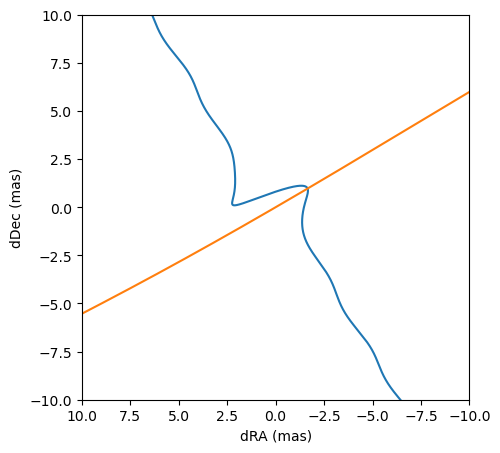

In [3]:
sourcecentroid = [results[1],results[2]]
lenscentroid = [results[3],results[4]]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(sourcecentroid[1],sourcecentroid[0])
ax.plot(lenscentroid[1],lenscentroid[0])
ran = 10
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)
ax.set_xlabel('dRA (mas)')
ax.set_ylabel('dDec (mas)')

(3.0, -3.0)

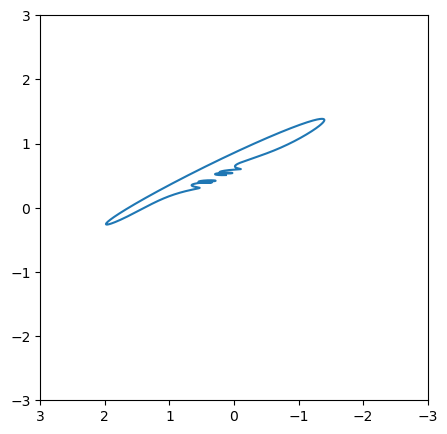

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(sourcecentroid[1]) - muS_RA*(t - t0)/365.25,np.array(sourcecentroid[0]) - muS_Dec*(t - t0)/365.25)
ran = 3
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)

Text(0, 0.5, 'dDec (mas)')

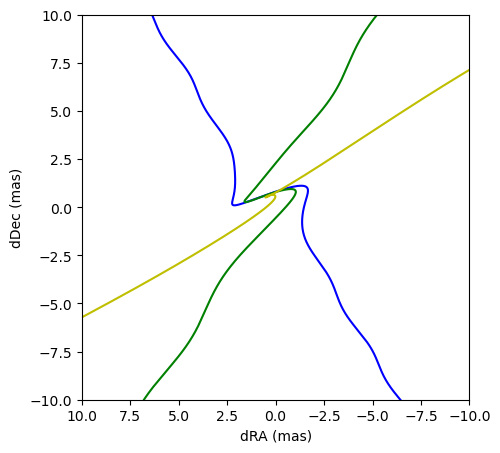

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
g = 0.
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'b')
g = 0.1
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'g')
g = 1
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'y')
ran = 10
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)
ax.set_xlabel('dRA (mas)')
ax.set_ylabel('dDec (mas)')